<a href="https://colab.research.google.com/github/Harold-Rodriguez/MNIST-SVM-Classification/blob/main/Mini_projet_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Packages

In [41]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
from sklearn.metrics import mean_squared_error
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Dataset

In [18]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

X = mnist['data']
y = mnist['target'].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

# Classifier

In [19]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(random_state=42)

In [20]:
y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.8348666666666666

Le score de précision est de 83,48, nous allons ensuite mettre à l'échelle l'ensemble de données d'entraînement pour avoir de meilleures prédictions

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [22]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(random_state=42)

In [23]:
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9214

Le score de accuracy es maintenant  de 92,14, ce qui est mieux qu'avant.

## Ensuite, nous ajouterons un Kernel

In [24]:
svm_clf = SVC(gamma="scale")
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

SVC()

In [25]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9455333333333333

Avec l'addition d'un Kernel on a une amélioration du resultat pasant à 94,55%

# Hyperparametres

À l'aide de la technique de validation croisée on va utiliserpetits ensembles de données et vérifions différentes valeurs d'hyperparamètres sur ces petits ensembles de données et répétons cet exercice plusieurs fois. 

Ensuite, on va trouver les meilleures valeurs de chaque hyperparamètre.

In [26]:
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....C=9.437655823275104, gamma=0.004847174406028079; total time=   0.3s
[CV] END ....C=9.437655823275104, gamma=0.004847174406028079; total time=   0.3s
[CV] END ....C=9.437655823275104, gamma=0.004847174406028079; total time=   0.3s
[CV] END ......C=3.141791304040356, gamma=0.0810504100536601; total time=   0.3s
[CV] END ......C=3.141791304040356, gamma=0.0810504100536601; total time=   0.3s
[CV] END ......C=3.141791304040356, gamma=0.0810504100536601; total time=   0.3s
[CV] END ..C=1.7633969734409496, gamma=0.0020959796571455983; total time=   0.2s
[CV] END ..C=1.7633969734409496, gamma=0.0020959796571455983; total time=   0.2s
[CV] END ..C=1.7633969734409496, gamma=0.0020959796571455983; total time=   0.2s
[CV] END ....C=4.372491493414181, gamma=0.012431298254009137; total time=   0.3s
[CV] END ....C=4.372491493414181, gamma=0.012431298254009137; total time=   0.3s
[CV] END ....C=4.372491493414181, gamma=0.012431

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9758c7b790>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9758c7b310>},
                   verbose=2)

In [27]:
rnd_search_cv.best_estimator_

SVC(C=8.659780449922016, gamma=0.001111357709887107)

In [28]:
rnd_search_cv.best_score_

0.8619907332482183

In [29]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=8.659780449922016, gamma=0.001111357709887107)

In [30]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

0.18748333259252675

In [34]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

0.6668583057891684

In [33]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9733

 Nous obtenons une amélioration et obtenons 97,33

# One-vs-One (OvO) Classification

In [36]:
svm = LinearSVC(random_state=42)
ovo_classifier = OneVsOneClassifier(svm)

In [ ]:
ovo_classifier = ovo_classifier.fit(X_train_scaled, y_train)

In [45]:
y_pred_ovo = ovo_classifier.predict(X_train_scaled)
accuracy_score(y_train, y_pred_ovo)

0.9768166666666667

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


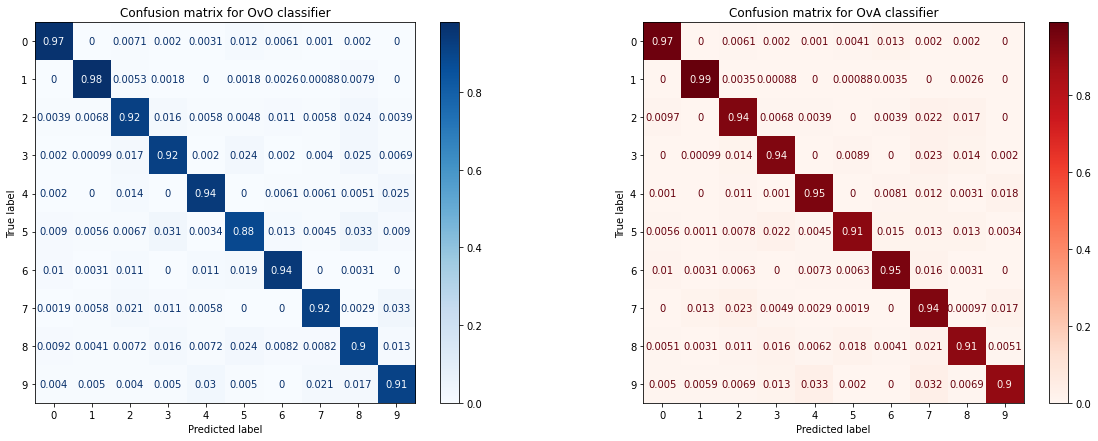

In [84]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
matrix_ovo = plot_confusion_matrix(ovo_classifier, X_test_scaled, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true', ax=ax1)

matrix_ova = plot_confusion_matrix(svm_clf, X_test_scaled, y_test,
                                 cmap=plt.cm.Reds,
                                 normalize='true', ax=ax2)
#plt.figure(figsize=(30, 20))
#plt.title('Confusion matrix for OvO classifier')
ax1.set_title('Confusion matrix for OvO classifier')
ax2.set_title('Confusion matrix for OvA classifier')
plt.show(matrix_ovo)
plt.show(matrix_ova)
plt.show()